In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/전국연도별방문자회계정보정말정말최종ver.csv')
df.columns

Index(['축제명', '개최년도', '축제기간(일)', '(현지인)방문자수', '(외지인)방문자수', '(외국인)방문자수',
       '(전체)방문자수', '일평균 방문자수', '전년도 일평균 방문자수', '일평균 방문자수 증감률', '(이전)전체방문자',
       '(전체)방문자증감', '(현지인)방문자비율', '(외지인)방문자비율', '(외국인)방문자비율', '전년대비방문자증감비율',
       'index_x', '도', '시군구', 'normalized_index_x', 'df1_index', 'df2_index',
       '회계연도', '지역명', '행사축제명', '총비용', '사업수익', '순원가', '시작월', '종료월', 'index_y',
       'normalized_index_y'],
      dtype='object')

In [3]:
df_year = (
    df.loc[df['개최년도'].between(2018, 2023), ['개최년도', '(전체)방문자수', '총비용']]
    .groupby('개최년도').sum())
df_year

,(전체)방문자수,총비용
개최년도,,
2018,13671214,8.508074e+10
2019,13945717,8.160728e+10
2022,16701817,6.981146e+10
2023,17024718,9.283927e+10


In [4]:
from sklearn.preprocessing import MinMaxScaler

ax = df[['개최년도', '시작월', '축제명', '(전체)방문자수', '총비용']].copy()
ax.columns = ['year', 'month', 'name', 'visitors', 'cost']
ax['visit/cost'] = np.where(ax['cost'] == 0, np.nan, ax['visitors'] / ax['cost'])       #비용 대비 방문객 항 추가.
ax = ax.dropna(subset = ['month'])


ax['visit/cost'] = np.log(ax['visit/cost'])                                             #값이 너무 튀어서 로그처리.

mms = MinMaxScaler()
ax['visit/cost_normalized'] = mms.fit_transform(ax[['visit/cost']])              


ax['month'] = ax['month'].astype(int)                                               #자꾸 마지막에 . 들어가서 int로 변경
ax['year_month'] = pd.to_datetime(ax['year'].astype(str) + '-' + ax['month'].astype(str).str.zfill(2))

ax['year_month'] = pd.Categorical(
    ax['year_month'].dt.strftime('%Y.%m'),  
    categories=ax['year_month'].dt.strftime('%Y.%m').sort_values().unique(),
    ordered=True)


ax_num = ax[['year_month', 'visitors', 'visit/cost_normalized']]                #년간 비교를 위해서 groupby 하려 했는데 object라 안나와서 좀 조정.
ax_num_y = ax[['year', 'visitors', 'visit/cost_normalized']]

ax_mean = ax_num.groupby('year_month').mean().reset_index()
ax_mean_y = ax_num_y.groupby('year').mean().reset_index()

C:\Users\Jongho\AppData\Local\Temp\ipykernel_9280\1778465045.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax_mean = ax_num.groupby('year_month').mean().reset_index()


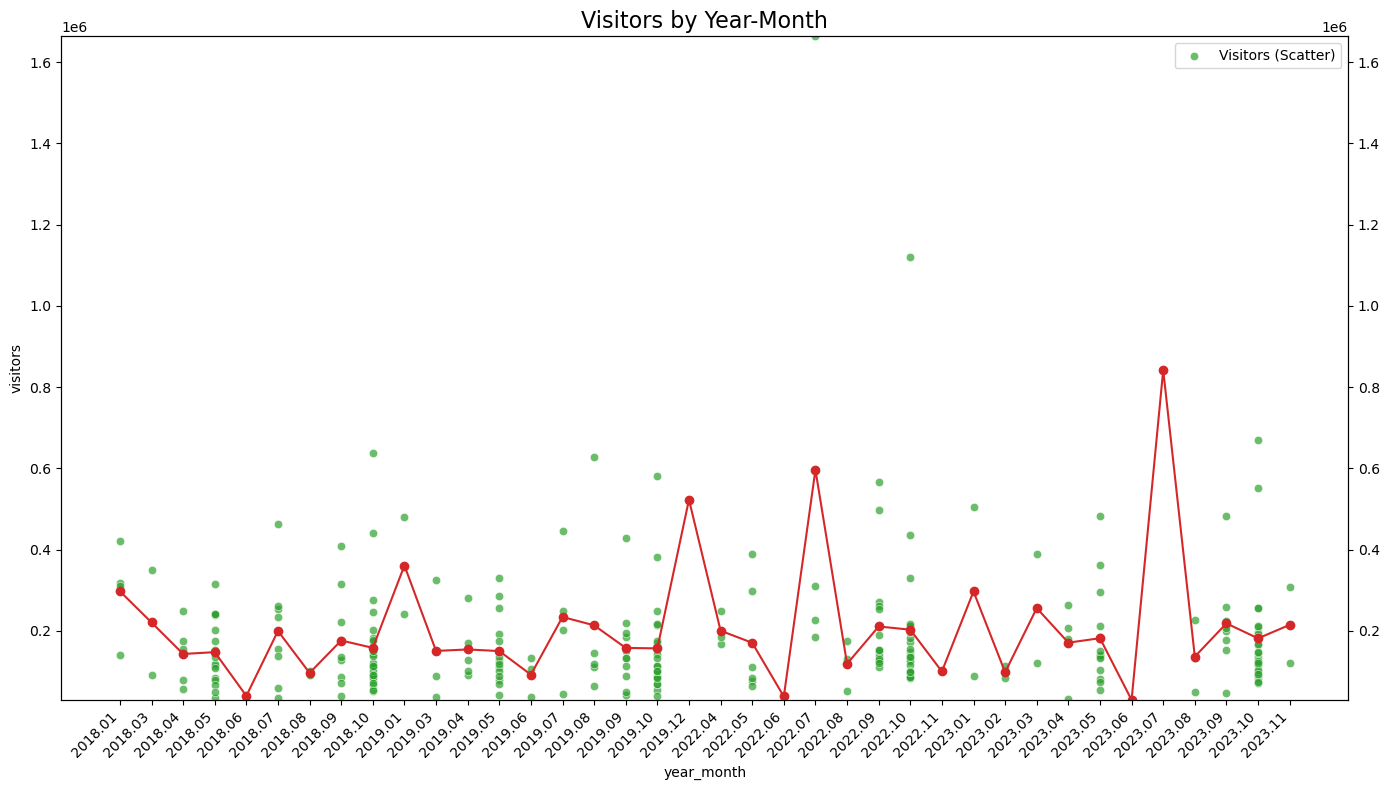

In [5]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 y축: Scatter Plot
sns.scatterplot(
    data=ax,
    x='year_month',
    y='visitors',
    color='tab:green', 
    alpha=0.7,
    label='Visitors (Scatter)',
    ax=ax1)

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 두 번째 y축: Line Plot
ax2.plot(
    ax_mean['year_month'],
    ax_mean['visitors'],
    color='tab:red',
    marker='o',
    label='Average Visitors')

# y축 범위를 동일하게 설정
y_min = min(ax['visitors'].min(), ax_mean['visitors'].min())
y_max = max(ax['visitors'].max(), ax_mean['visitors'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# x축 설정
ax1.set_xticks(range(len(ax_mean['year_month'])))
ax1.set_xticklabels(ax_mean['year_month'], rotation=45, ha='right', fontsize=10)

# 그래프 제목 설정
plt.title('Visitors by Year-Month', fontsize=16)

# 레이아웃 조정
plt.tight_layout()
plt.show()

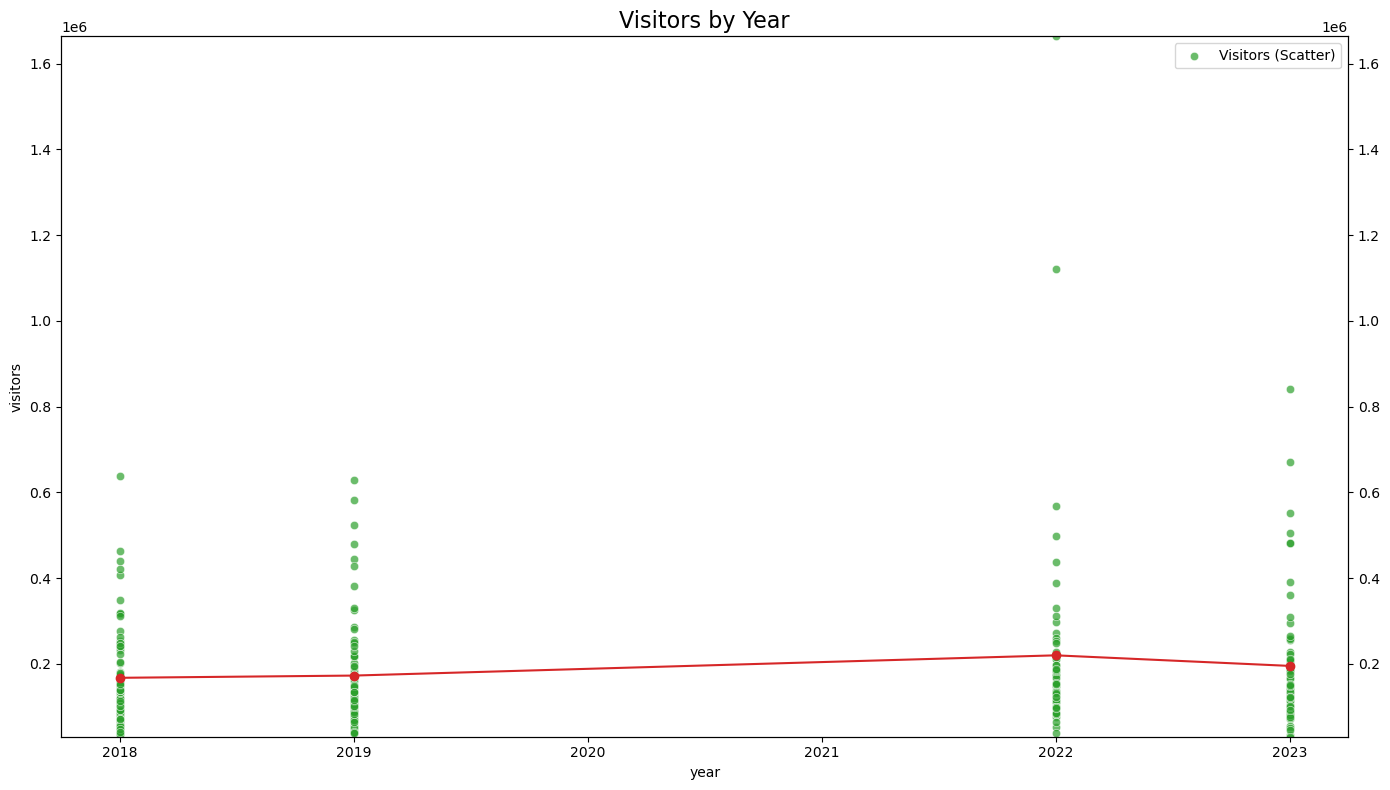

In [9]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 y축: Scatter Plot
sns.scatterplot(
    data=ax,
    x='year',
    y='visitors',
    color='tab:green', 
    alpha=0.7,
    label='Visitors (Scatter)',
    ax=ax1)

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 두 번째 y축: Line Plot
ax2.plot(
    ax_mean_y['year'],
    ax_mean_y['visitors'],
    color='tab:red',
    marker='o',
    label='Average Visitors')

# y축 범위를 동일하게 설정
y_min = min(ax['visitors'].min(), ax_mean_y['visitors'].min())
y_max = max(ax['visitors'].max(), ax_mean_y['visitors'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)


# 그래프 제목 설정
plt.title('Visitors by Year', fontsize=16)

# 레이아웃 조정
plt.tight_layout()
plt.show()

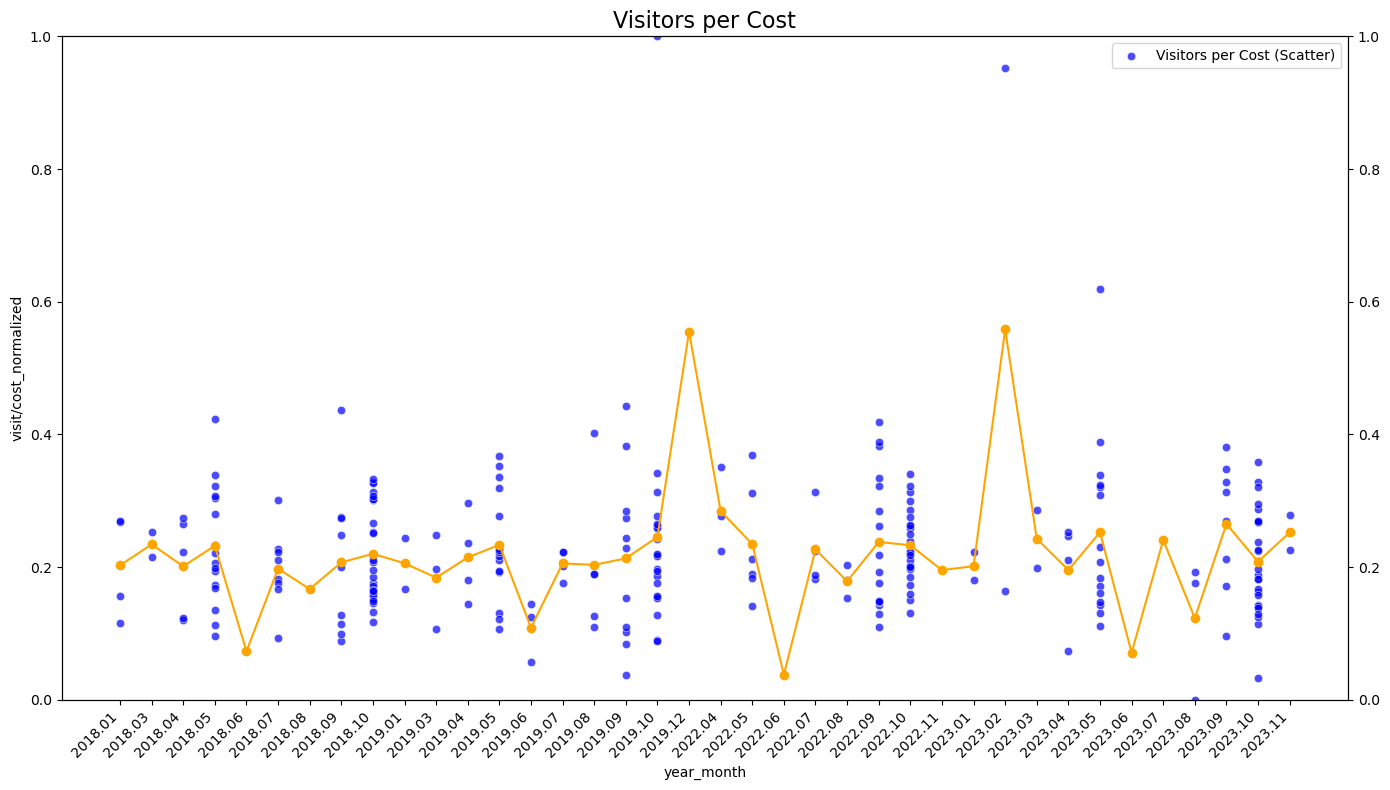

In [7]:
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.scatterplot(
    data=ax,
    x='year_month',
    y='visit/cost_normalized',
    color='blue',
    alpha=0.7,
    label='Visitors per Cost (Scatter)',
       ax=ax1)

ax2 = ax1.twinx()

ax2.plot(
    ax_mean['year_month'],
    ax_mean['visit/cost_normalized'],
    color='orange',
    marker='o',
    label='Average Visitors per Cost')

y_min = min(ax['visit/cost_normalized'].min(), ax_mean['visit/cost_normalized'].min())
y_max = max(ax['visit/cost_normalized'].max(), ax_mean['visit/cost_normalized'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

ax1.set_xticks(range(len(ax_mean['year_month'])))
ax1.set_xticklabels(ax_mean['year_month'], rotation=45, ha='right', fontsize=10)

plt.title('Visitors per Cost', fontsize=16)

plt.tight_layout()
plt.show()
